### OCI Data Science - Explore data, Join, and clean

Before using this notebook users have to download neccessary data. We've collected/downloaded the data in advance by usiltizing `00 pull data.ipunb` notebook and saved them to `data` folder. This helps to save time though data-download may take a few hours.

## Contents:

* <a href='#intro'>Introduction</a>
* <a href='#weatherdata'>weather data</a>
* <a href='#lapsdata'>laps data</a>
* <a href='#resultdata'>results data</a>
* <a href='#Joindata'>merge weather and lap data</a>
* <a href='#plotsamplelapdata'>plot sample lap data</a>

<a id='intro'></a>
## Introduction

The data have already been saved in `data` folder. The data of intrest has `.pickle` extension and they are raw which requires preprocessed and prepared for feature extraction and model building.

This notebook only focuses on what is in the raw data.

#### Load packages

In [ ]:
path = '/home/datascience/WorkSpace/RedBull-Racining-TimeToPit/notebooks'
data_path = '../../RedBull/data/'

In [2]:
import os
os.chdir(path)
import pandas as pd
import logging
import json
import pickle
import requests
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

<a id='weatherdata'></a>
## Weather Data
Weather data is available in session level and its time stamp is not aligned with laps-data.


In [3]:
file = open(data_path+'weathers_data.pickle','rb')
df_weather = pickle.load(file)
df_weather['eventYear'] = pd.DatetimeIndex(df_weather['EventDate']).year
df_weather.head(2)

,Time,AirTemp,Humidity,Pressure,Rainfall,TrackTemp,WindDirection,WindSpeed,RoundNumber,EventName,country,session,EventDate,eventYear
0,0 days 00:00:24.964000,25.3,36.7,1020.2,False,38.5,330,2.6,1,Australian Grand Prix,Australia,FP1,2018-03-23,2018
1,0 days 00:01:24.977000,25.4,36.9,1020.0,False,38.5,308,2.5,1,Australian Grand Prix,Australia,FP1,2018-03-23,2018


In [4]:
ave_weather = df_weather[df_weather['session']=='Race'].groupby(['EventName','session','EventDate']).mean().reset_index().sort_values(['EventName'])
ave_weather.head(5)

,EventName,session,EventDate,AirTemp,Humidity,Pressure,Rainfall,TrackTemp,WindDirection,WindSpeed,RoundNumber,eventYear
0,70th Anniversary Grand Prix,Race,2020-08-09,25.287069,58.556034,1000.950862,0.000000,43.227586,71.931034,2.236207,5.0,2020.0
1,Abu Dhabi Grand Prix,Race,2018-11-25,31.273723,45.437956,1013.111679,0.043796,33.318248,241.175182,2.163504,21.0,2018.0
2,Abu Dhabi Grand Prix,Race,2019-12-01,26.018045,64.471429,1015.383459,0.000000,29.566165,221.097744,1.264662,21.0,2019.0
3,Abu Dhabi Grand Prix,Race,2020-12-13,23.121481,55.446667,1015.847407,0.000000,27.980000,258.244444,2.504444,17.0,2020.0
4,Abu Dhabi Grand Prix,Race,2021-12-12,24.519108,59.054777,1017.710828,0.000000,28.465605,289.191083,0.414650,22.0,2021.0


### Example: Track temp, ambient temp and humidity

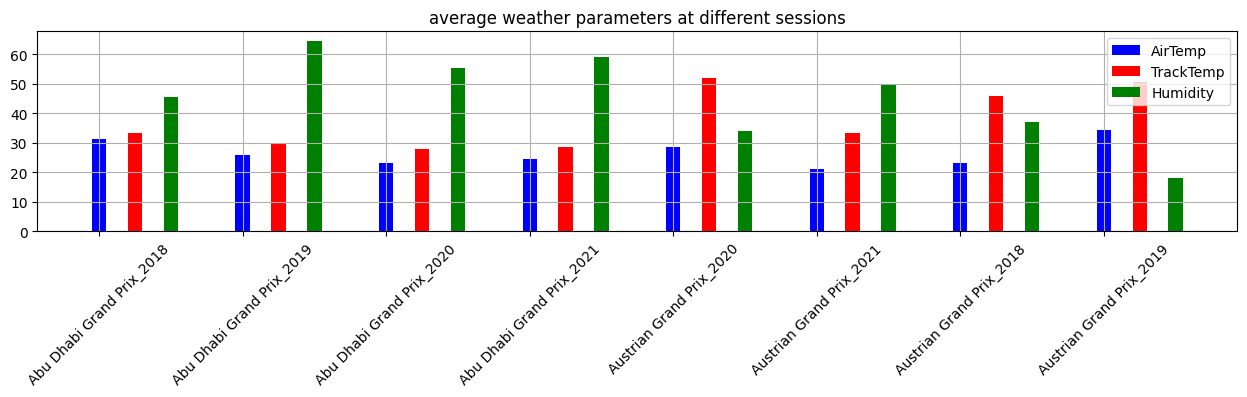

In [5]:
def plot_weather(d_f):
    '''
    tire life/peformance is dependent to the track temp
    
    '''
    fig = plt.figure(figsize=(12,2))
    ax = fig.add_axes([0,0,1,1])
    labels = [d_f.loc[x,['EventName']].values[0] +'_'+ 
              str(pd.DatetimeIndex(d_f.loc[x,['EventDate']]).year.values[0]) 
              for x in range(len(d_f))]
    x = np.arange(len(labels) )
    ax.bar(x + 0.00, d_f['AirTemp'], color='b', width=0.10)
    ax.bar(x + 0.25, d_f['TrackTemp'], color='r', width=0.10)
    ax.bar(x + 0.50, d_f['Humidity'], color='g', width=0.10)
    ax.set_xticks(x, labels, rotation=45, fontsize =10)
    ax.legend(['AirTemp','TrackTemp','Humidity'])
    ax.grid()
    plt.title('average weather parameters at different sessions')
    plt.show()
    return

plot_weather(ave_weather[(ave_weather['EventName']=='Austrian Grand Prix') | 
                        (ave_weather['EventName']=='Abu Dhabi Grand Prix')].reset_index() )

<a id='resultdata'></a>
## Results

Load data and select only `Red Bull Racing`.

Dropping non-race and non-qual rows from results data and keeping the following columns:
`'Position','FullName','Q1Sec','Q2Sec','Q3Sec','RoundNumber','EventName','eventYear','session','TimeSec'`

In [6]:
file = open(data_path+'results_data.pickle','rb')
df_res = pickle.load(file)

df_res['eventYear'] = pd.DatetimeIndex(df_res['EventDate']).year
df_res['Q1Sec'] = df_res['Q1']/np.timedelta64(1, 's')
df_res['Q2Sec'] = df_res['Q2']/np.timedelta64(1, 's')
df_res['Q3Sec'] = df_res['Q3']/np.timedelta64(1, 's')
df_res['TimeSec'] = df_res['Time']/np.timedelta64(1, 's')

## Selct only Red Bull Racing
df_res = df_res[df_res['TeamName']=='Red Bull Racing'] 

## keep only race and qual data
df_res = df_res[(df_res['session']=='Race') | (df_res['session']=='Qualifying')]
print('df_res size is: ', df_res.shape)
print('-'*100,'\n')

df_res= df_res[['Position','GridPosition','FullName','Q1Sec','Q2Sec','Q3Sec','RoundNumber','Abbreviation',
                'EventName','eventYear','session','Time','TimeSec','TeamName', 'EventDate']]
df_res[df_res['RoundNumber']==5].sort_values(['Position','eventYear','Abbreviation',],ascending=False)

df_res size is:  (362, 27)
---------------------------------------------------------------------------------------------------- 



,Position,GridPosition,FullName,Q1Sec,Q2Sec,Q3Sec,RoundNumber,Abbreviation,EventName,eventYear,session,Time,TimeSec,TeamName,EventDate
8,9.0,0.0,Sergio Perez,71.644,71.019,71.573,5,PER,Monaco Grand Prix,2021,Qualifying,NaT,NaN,Red Bull Racing,2021-05-22 00:00:00
8,9.0,0.0,Alexander Albon,87.153,86.642,86.669,5,ALB,70th Anniversary Grand Prix,2020,Qualifying,NaT,NaN,Red Bull Racing,2020-08-08 00:00:00
5,6.0,0.0,Pierre Gasly,77.862,76.932,76.708,5,GAS,Spanish Grand Prix,2019,Qualifying,NaT,NaN,Red Bull Racing,2019-05-11 00:00:00
5,6.0,6.0,Pierre Gasly,NaN,NaN,NaN,5,GAS,Spanish Grand Prix,2019,Race,0 days 01:36:10.019000,5770.019,Red Bull Racing,2019-05-12 00:00:00
5,6.0,0.0,Daniel Ricciardo,77.623,77.638,76.818,5,RIC,Spanish Grand Prix,2018,Qualifying,NaT,NaN,Red Bull Racing,2018-05-12 00:00:00
4,5.0,9.0,Alexander Albon,NaN,NaN,NaN,5,ALB,70th Anniversary Grand Prix,2020,Race,0 days 01:20:21.139000,4821.139,Red Bull Racing,2020-08-09 00:00:00
4,5.0,0.0,Max Verstappen,77.411,77.266,76.816,5,VER,Spanish Grand Prix,2018,Qualifying,NaT,NaN,Red Bull Racing,2018-05-12 00:00:00
4,5.0,6.0,Daniel Ricciardo,NaN,NaN,NaN,5,RIC,Spanish Grand Prix,2018,Race,0 days 01:36:20.030000,5780.030,Red Bull Racing,2018-05-13 00:00:00
3,4.0,0.0,Sergio Perez,90.055,89.673,89.036,5,PER,Miami Grand Prix,2022,Qualifying,NaT,NaN,Red Bull Racing,2022-05-07 16:00:00
3,4.0,4.0,Sergio Perez,NaN,NaN,NaN,5,PER,Miami Grand Prix,2022,Race,0 days 01:34:34.896000,5674.896,Red Bull Racing,2022-05-08 15:30:00


<a id='lapsdata'></a>
## Laps Data

Load data and select only `Red Bull Racing`. 

In [7]:
file = open(data_path+'laps_data.pickle','rb')
drop_cols = ['Sector1Time','Sector2Time','Sector3Time',
             'Sector1SessionTime','Sector2SessionTime','Sector3SessionTime',
            'SpeedI1','SpeedI2','SpeedFL', 'IsAccurate']

df_laps = pickle.load(file).drop(drop_cols,axis=1).reset_index(drop=True)

df_laps['eventYear'] = pd.DatetimeIndex(df_laps['EventDate']).year
df_laps['lapTimeSec'] = df_laps['LapTime']/np.timedelta64(1, 's')
df_laps = df_laps[df_laps['Team']=='Red Bull Racing']
df_laps.head()

,Time,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,SpeedST,IsPersonalBest,Compound,...,Driver,TrackStatus,LapStartDate,RoundNumber,EventName,country,session,EventDate,eventYear,lapTimeSec
116,0 days 00:37:51.909000,33,NaT,1.0,2.0,0 days 00:18:12.880000,0 days 00:20:00.182000,211.0,False,SOFT,...,VER,1,2019-03-15 01:03:13.017,1,Australian Grand Prix,Australia,FP1,2019-03-15,2019,NaN
117,0 days 00:39:54.697000,33,0 days 00:02:02.788000,2.0,2.0,0 days 00:37:55.988000,NaT,310.0,False,SOFT,...,VER,1,2019-03-15 01:22:52.046,1,Australian Grand Prix,Australia,FP1,2019-03-15,2019,122.788
118,0 days 00:41:20.085000,33,0 days 00:01:25.388000,3.0,2.0,NaT,NaT,255.0,False,SOFT,...,VER,1,2019-03-15 01:24:54.834,1,Australian Grand Prix,Australia,FP1,2019-03-15,2019,85.388
119,0 days 00:43:19.386000,33,0 days 00:01:59.301000,4.0,2.0,NaT,NaT,313.0,False,SOFT,...,VER,1,2019-03-15 01:26:20.222,1,Australian Grand Prix,Australia,FP1,2019-03-15,2019,119.301
120,0 days 00:44:44.359000,33,0 days 00:01:24.973000,5.0,2.0,NaT,NaT,245.0,False,SOFT,...,VER,1,2019-03-15 01:28:19.523,1,Australian Grand Prix,Australia,FP1,2019-03-15,2019,84.973


### Checking if best Qual time from `results-data` is the same as best Qual time from `lap-data`
Best lap-time from lap Data. are we expecting to see the same best time from `results-data`?

In [8]:
best_Q = df_laps.groupby(['EventName','eventYear','session','Driver'])['lapTimeSec'].min().reset_index(name='minTime')
best_Q[((best_Q['session']=='Race')|(best_Q['session']=='Qualifying') ) & 
(best_Q['EventName']=='Abu Dhabi Grand Prix') &
(best_Q['Driver']=='PER')].sort_values(['session'])

,EventName,eventYear,session,Driver,minTime
46,Abu Dhabi Grand Prix,2021,Qualifying,PER,82.947
48,Abu Dhabi Grand Prix,2021,Race,PER,86.419


In [9]:
# best_Q = df_res.groupby(['EventName','eventYear','session','FullName'])['Q1Sec','Q2Sec','Q3Sec','TimeSec'].min().reset_index()

# best_Q[((best_Q['session']=='Race')|(best_Q['session']=='Qualifying')|(best_Q['session']=='SQ') ) & 
# (best_Q['EventName']=='Abu Dhabi Grand Prix') &
# (best_Q['Abbreviation']=='PER')].sort_values(['session'])

df_res[['TeamName', 'session','EventDate','eventYear','Q1Sec','Q2Sec','Q3Sec','TimeSec']][((df_res['session']=='Race')|(df_res['session']=='Qualifying') ) & 
(df_res['EventName']=='Abu Dhabi Grand Prix') &
(df_res['Abbreviation']=='PER')].sort_values(['session'])

,TeamName,session,EventDate,eventYear,Q1Sec,Q2Sec,Q3Sec,TimeSec
3,Red Bull Racing,Qualifying,2021-12-11,2021,83.35,83.135,82.947,NaN
14,Red Bull Racing,Race,2021-12-12,2021,NaN,NaN,NaN,NaN


Best Qual time from results-data and lap-data are the same! 
We will be using best Qual time as a feature from lap-data. 

### End of data exploration